### This jupyter notebook is to unit-test CFE model run

## Preparation

In [65]:
# Import modules
import json
from bmi_cfe import BMI_CFE

In [66]:
# Input: Little Washita data for 12 yrs
# forcing: LittleWashita/little_washita_2006_2012.csv
# observed: test_sm_basinavg


# Parameter: only limited number of parameters
# 	Unnamed: 0	like1	parbb	parsatdk	parsatpsi	parslop	parsmcmax	parwltsmc	parmax_gw_storage	parCgw	parexpon	parK_nash	parrefkdt	partrigger_z_fact	paralpha_fc	parK_lf	parnum_nash_storage
# 2869	2869	0.178421	3.291205	0.616596	0.78	0.029422	0.894693	0.095967	53.201708	0.0015	6.410308	0.227507	9990.000000	0.75	0.1	0.996	20.86379


# 	Unnamed: 0	like1	parbb	parsatdk	parsatpsi	parslop	parsmcmax	parwltsmc	parmax_gw_storage	parCgw	parexpon	parK_nash	parrefkdt	partrigger_z_fact	paralpha_fc	parK_lf	parD	parnum_nash_storage
# 592	592	0.876861	1.272496	0.000367	0.484279	0.000072	0.29342	0.002927	225.240689	9.625560	5.012957	0.047537	9990.000000	0.649522	0.10847	0.234793	100.0	80.706118

# 	Unnamed: 0	like1	parbb	parsatdk	parsatpsi	parslop	parsmcmax	parwltsmc	parmax_gw_storage	parCgw	parexpon	parK_nash	parrefkdt	partrigger_z_fact	paralpha_fc	parK_lf	parD	parnum_nash_storage
# 1468	1468	0.242275	0.0546	0.100876	0.769738	0.031752	0.344641	0.048044	419.597873	3.171141	0.254816	0.407342	7688.784902	0.673953	0.185811	0.996	44.226973	5.62484

# 	Unnamed: 0	like1	parbb	parsatdk	parsatpsi	parslop	parsmcmax	parwltsmc	parmax_gw_storage	parCgw	parexpon	parK_nash	parrefkdt	partrigger_z_fact	paralpha_fc	parK_lf	parD	parnum_nash_storage
# 1471	1471	0.211987	8.990886	0.060442	0.638266	0.87453	0.948077	0.012942	497.91655	1.522687	0.945915	0.3	7048.340683	0.695436	0.150908	0.000424	97.296499	100.0

input_json = '../../data/unit_test/config_cfe.json'
params = {
    "forcing_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/LittleWashita/little_washita_2006_2012.csv",
    "catchment_area_km2": 601,
    "soil_params": {
        "bb": 1.01,
        "satdk": 0.00001,
        "slop": 1,
        "satpsi": 0.33,
        "smcmax": 0.5,
        "wltsmc": 0.0129467948981879,
        "D": 10,
    },
    "alpha_fc": 0.3083778619066096,
    "max_gw_storage": 10,
    "Cgw": 0.0001,
    "expon": 0.01,
    "K_lf": 0.01,
    "refkdt": 10000,
    "K_nash": 1,
    "trigger_z_fact": 0.75,
    "num_nash_storage": 10,
    "giuh_ordinates": [0.5, 0.5], #[0.1, 0.4, 0.2, 0.2, 0.1],
    "stand_alone": 1,
    "unit_test": 1,
    "compare_results_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/LittleWashita/test_sm_basinavg.csv",
}

with open(input_json, 'w') as outfile:
    json.dump(params, outfile, indent=4)

with open(input_json) as outfile:
    loaded_data = json.load(outfile)

## Run the model

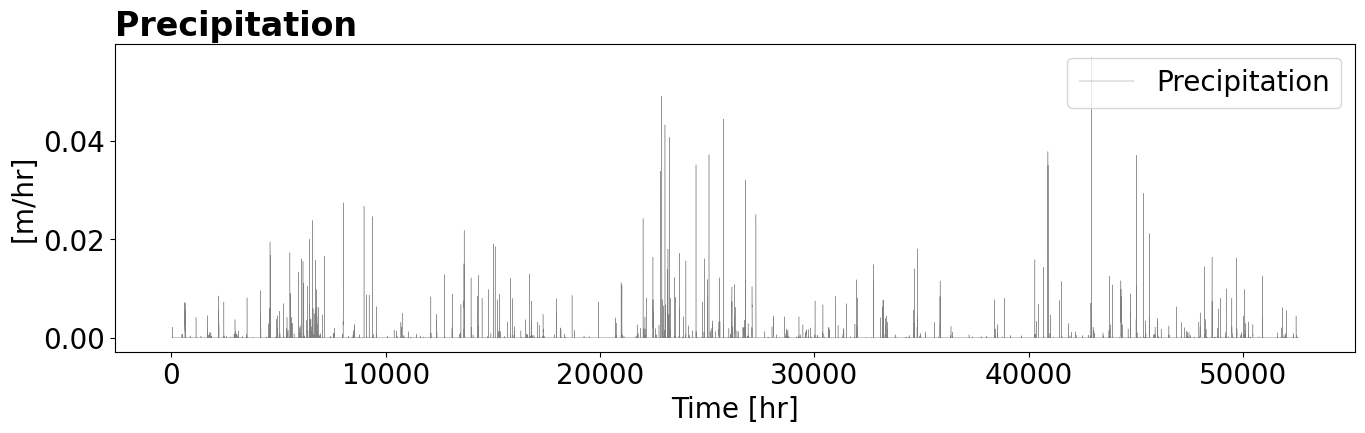

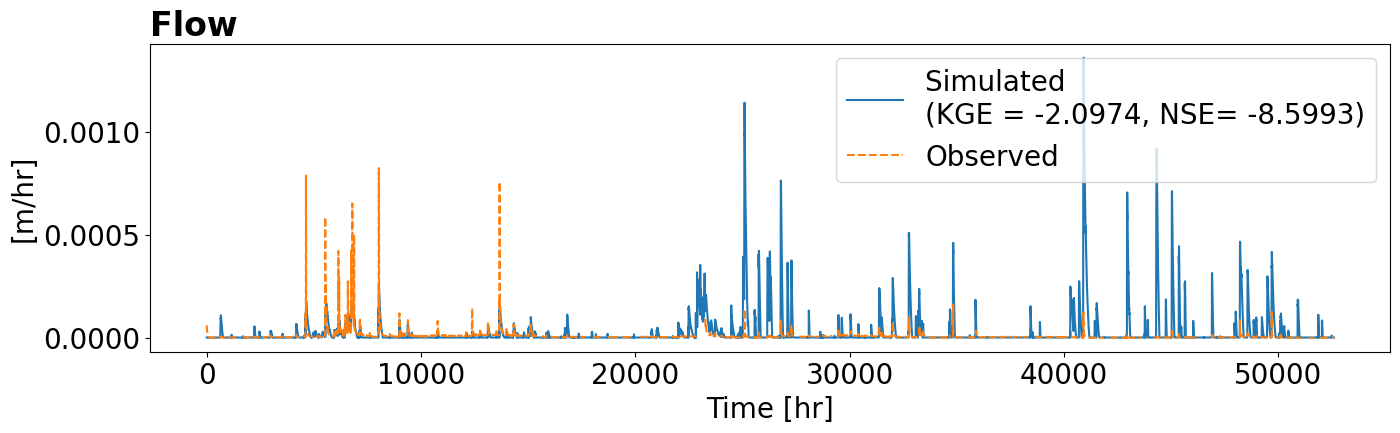

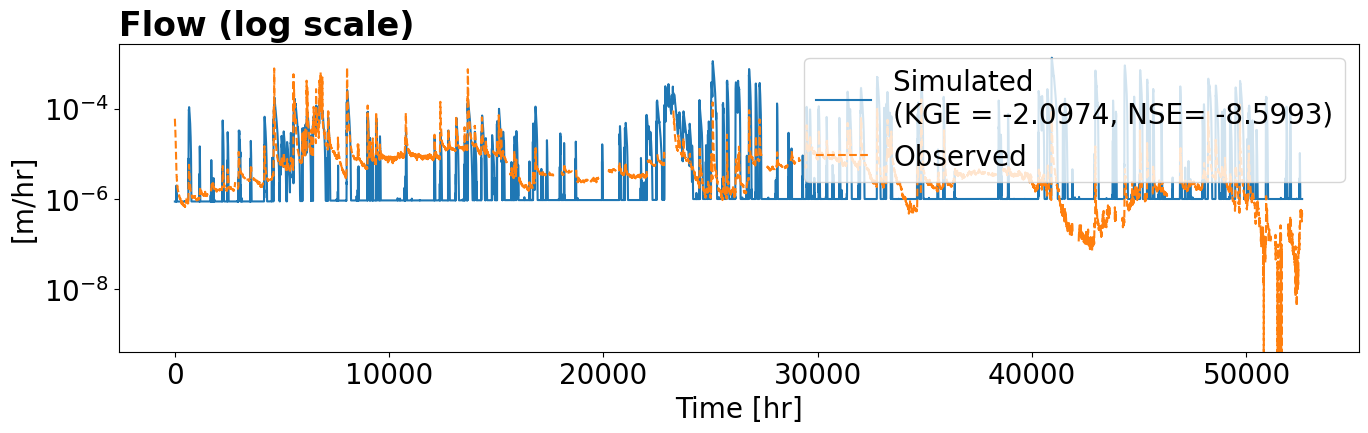

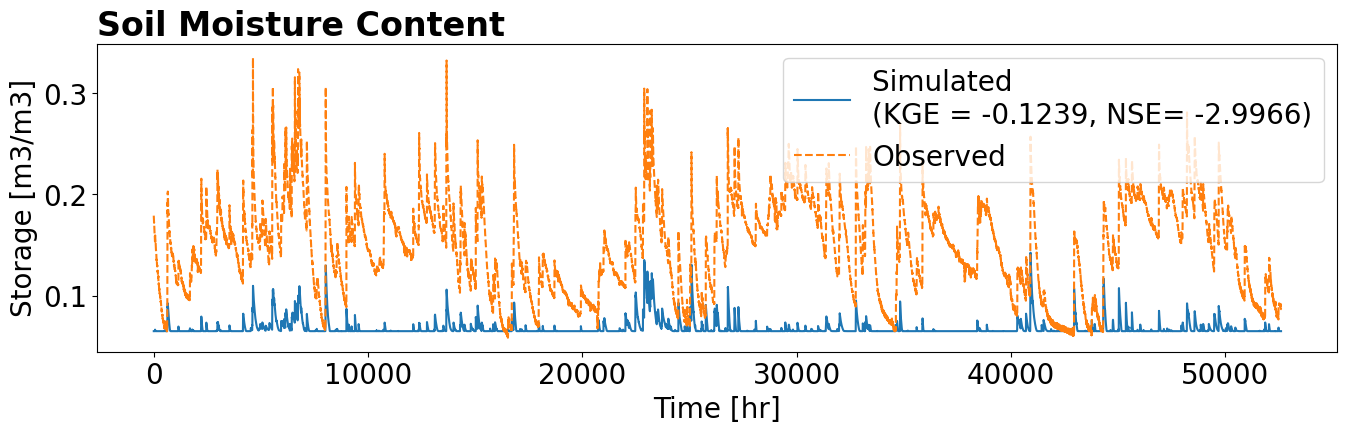

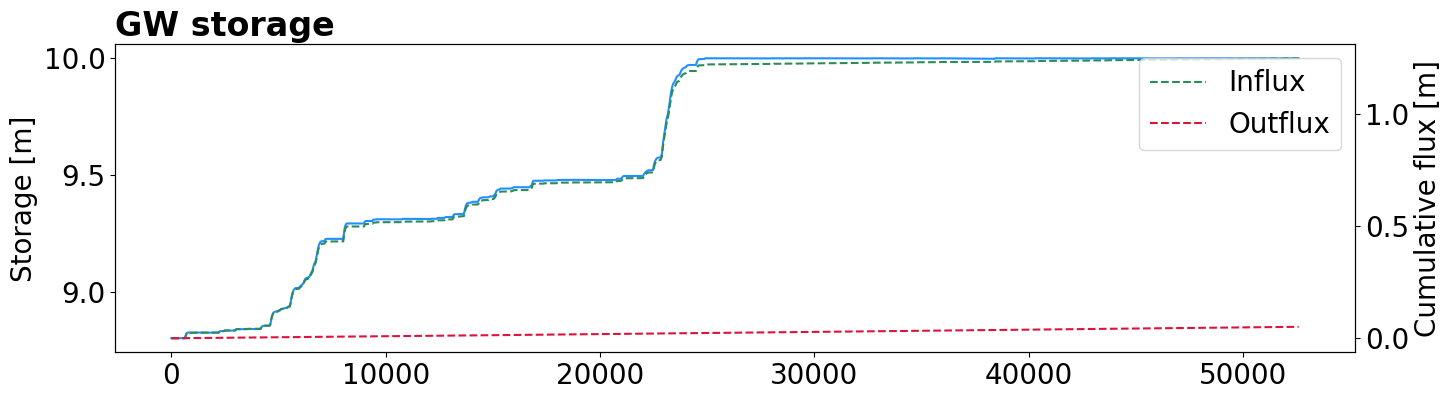

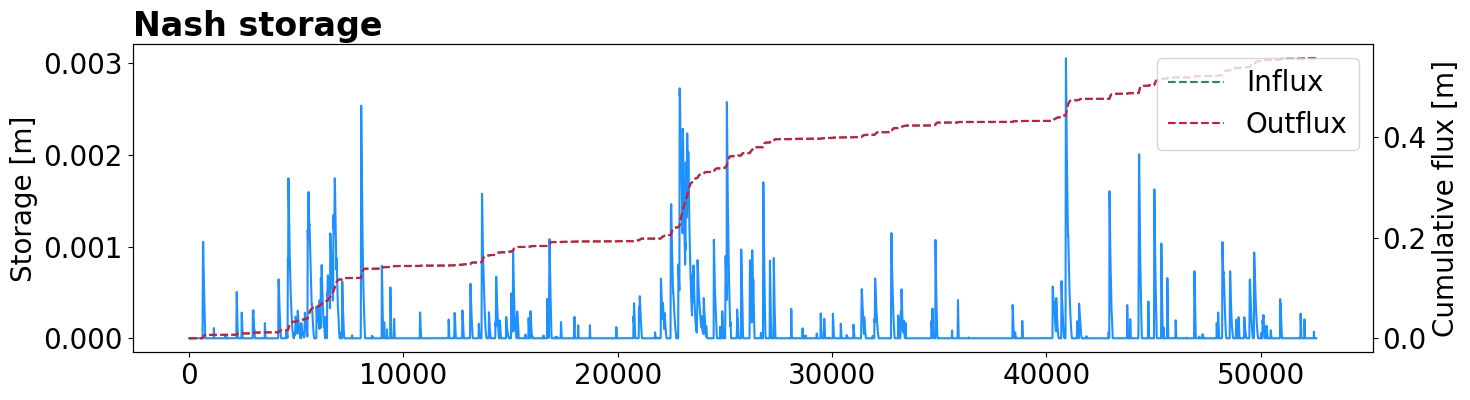

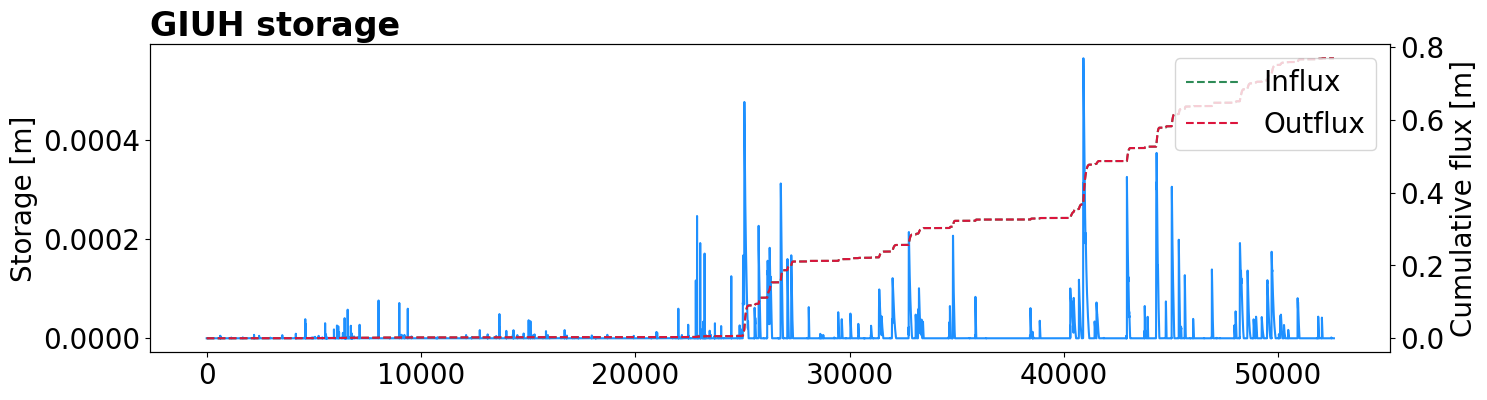


GLOBAL MASS BALANCE
      initial volume:   8.9335
        volume input:   5.9018
       volume output:   4.7061
        final volume:  10.1292
            residual: -1.7568e-12

 Discharge details
Cumulative discharge: 1.38
        Runoff ratio: 0.23
      Surface runoff: 0.56
  Deep GW to channel: 0.04
        Lateral flow: 0.40

 AET & PET
      volume PET:  14.4689
      volume AET:   3.3295
ET from rainfall:   0.6505
    ET from soil:   2.6790

SCHAAKE MASS BALANCE
    volume input:   5.9018
ET from rainfall:   0.6505
  surface runoff:   0.7690
             IOF:   0.0123
             SOF:   0.7567
    infiltration:   4.4824
schaake residual: -1.3323e-14

GIUH MASS BALANCE
  vol. into giuh:   0.7690
   vol. out giuh:   0.7690
 vol. end giuh q:   0.0000
   giuh residual: 5.5511e-16

SOIL WATER CONCEPTUAL RESERVOIR MASS BALANCE
   init soil vol:   0.1295
  vol. into soil:   4.4824
vol.soil2latflow:   0.5565
 vol. soil to gw:   1.2468
 vol. soil to ET:   2.6790
 final vol. soil:   0.

In [67]:
cfe_instance = BMI_CFE(input_json)
cfe_instance.initialize()
cfe_instance.run_unit_test(plot=True, print_fluxes=False, warm_up=True, warmup_offset=12000, warmup_iteration=10,)
cfe_instance.finalize(print_mass_balance=True)

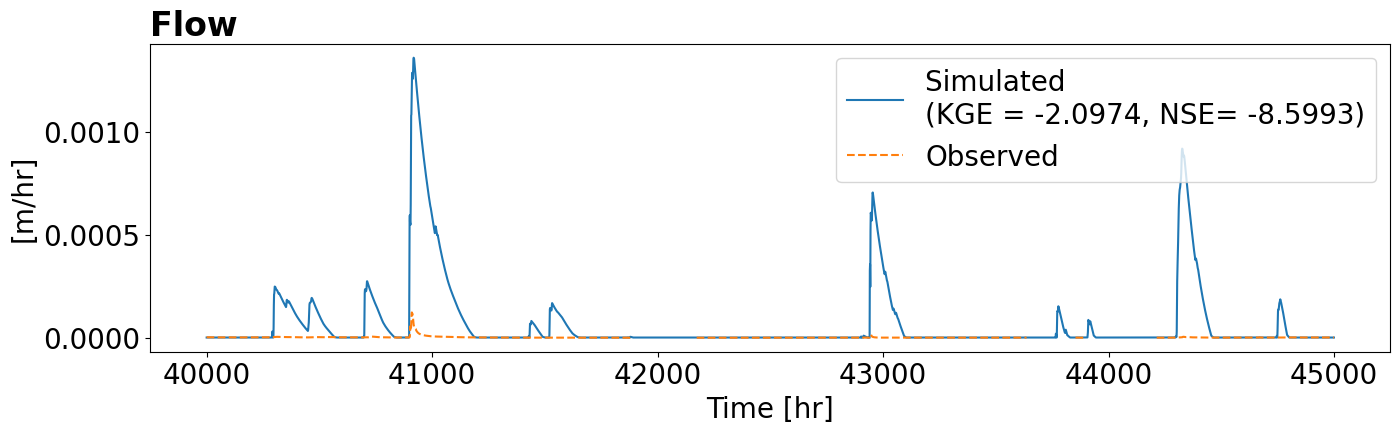

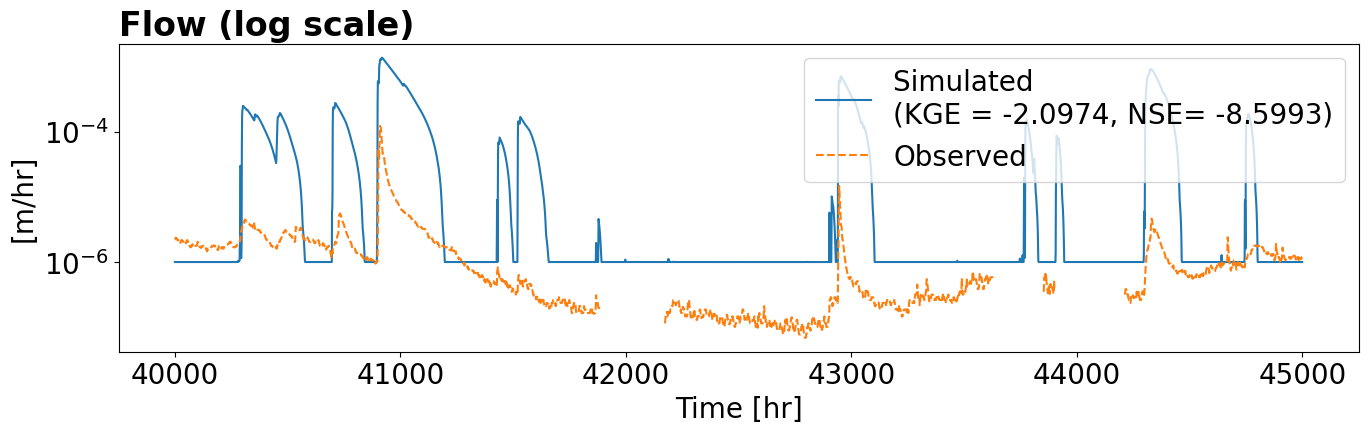

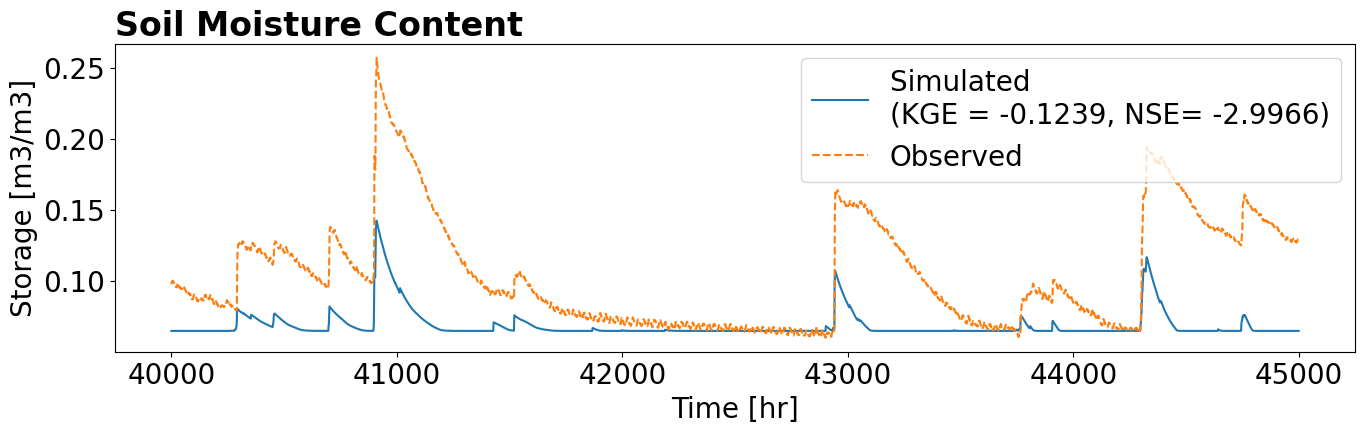

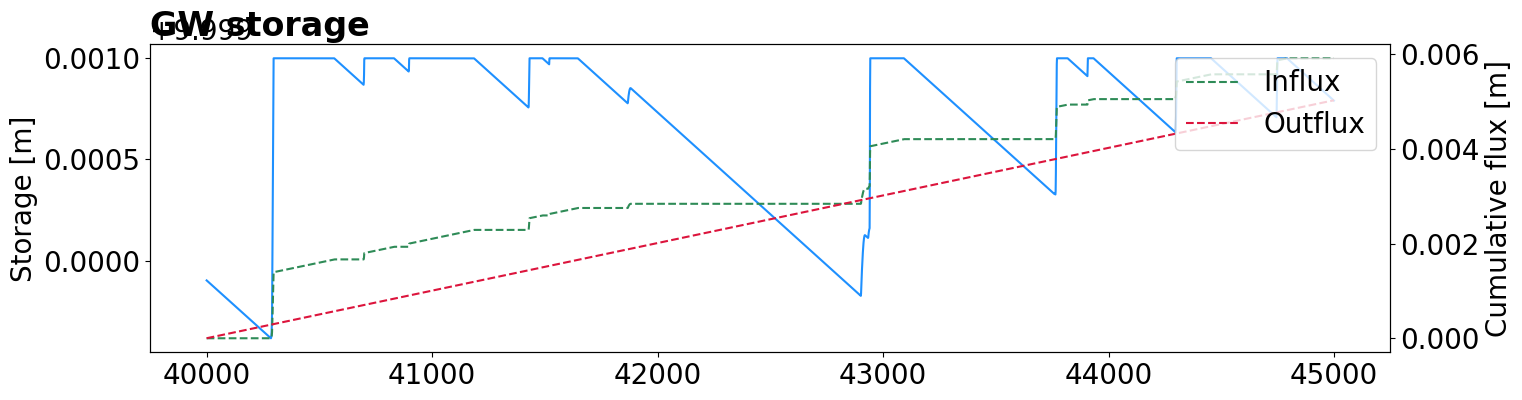

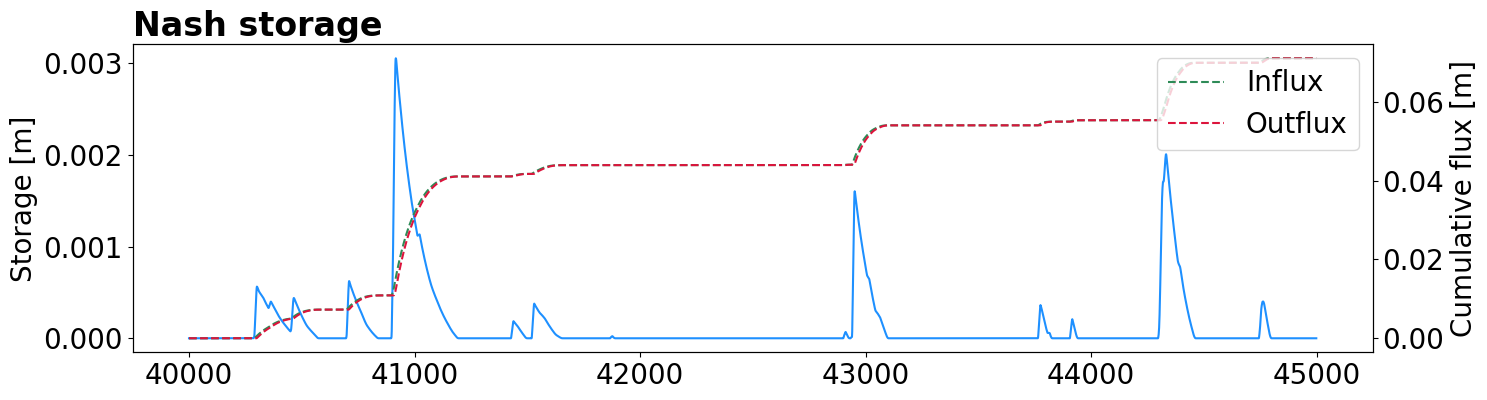

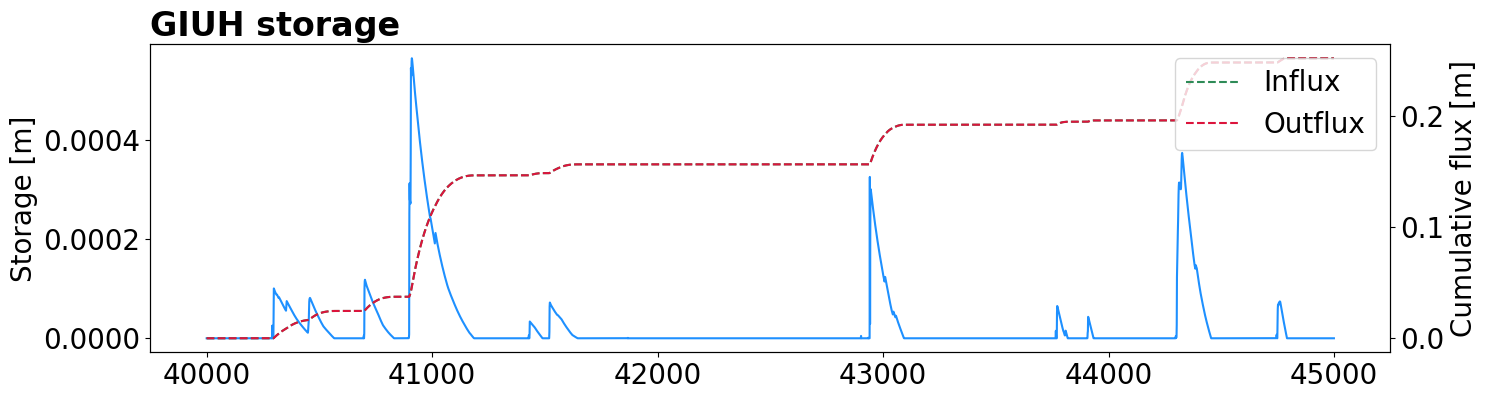

In [68]:
# plot close-look
plot_lim_closeup = list(range(40000, 45000))
cfe_instance.plot_flow(plot_lims=plot_lim_closeup)
cfe_instance.plot_SM(plot_lims=plot_lim_closeup)
for output_type in [
                "GW storage",
                "Nash storage",
                "GIUH storage",
            ]:
    cfe_instance.plot_other_fluxes(plot_lims=plot_lim_closeup, output_type=output_type)